**STEP 1**: The installation, importation and upgrade on the necessary libraries. This step cannot be missed. There is no code without it

In [18]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of a clear interface for the change of ticker, start date and end dates. I never miss this in my codes

In [2]:
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2024-11-22"

**STEP 3**: Creating a pipeline to the Yahoo Finance API to collect the data based on the ticker, start date and end date.

In [19]:
data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2020-01-02 00:00:00+00:00    5.973123    5.997750    5.997750    5.918000   
2020-01-03 00:00:00+00:00    5.877518    5.901750    5.945750    5.852500   
2020-01-06 00:00:00+00:00    5.902165    5.926500    5.931750    5.781750   
2020-01-07 00:00:00+00:00    5.973621    5.998250    6.044250    5.909750   
2020-01-08 00:00:00+00:00    5.984824    6.009500    6.051000    5.953750   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  141.979996  141.979996  145.240005  140.080002   
2024-11-18 00:00:00+00:00  140.149994  140.149994  141.550003  137.149994   
2024-11-19 00:00:00+00:00  147.009995  147.009995  147.130005  140.990005   
2024-11-20 00:00:00+00:00  145.889999  145.889999  147.559998  142.729996   

**STEP 4**: Dropping the columns that are not needed for this project. The necessary column is the CLOSE column.

In [20]:
data = data.drop(columns=['Adj Close', 'High', 'Low', 'Open', 'Volume'])
print(data)

Price                           Close
Ticker                           NVDA
Date                                 
2020-01-02 00:00:00+00:00    5.997750
2020-01-03 00:00:00+00:00    5.901750
2020-01-06 00:00:00+00:00    5.926500
2020-01-07 00:00:00+00:00    5.998250
2020-01-08 00:00:00+00:00    6.009500
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[1232 rows x 1 columns]


**STEP 5**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [21]:
df = pd.DataFrame(data)
print(df)

Price                           Close
Ticker                           NVDA
Date                                 
2020-01-02 00:00:00+00:00    5.997750
2020-01-03 00:00:00+00:00    5.901750
2020-01-06 00:00:00+00:00    5.926500
2020-01-07 00:00:00+00:00    5.998250
2020-01-08 00:00:00+00:00    6.009500
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[1232 rows x 1 columns]


**STEP 6**: The computation of the Exponential Moving Average

In [22]:
ema_window_size = 5
df['EMA'] = df['Close'].ewm(span=ema_window_size, adjust=False).mean()
print(df)

Price                           Close         EMA
Ticker                           NVDA            
Date                                             
2020-01-02 00:00:00+00:00    5.997750    5.997750
2020-01-03 00:00:00+00:00    5.901750    5.965750
2020-01-06 00:00:00+00:00    5.926500    5.952667
2020-01-07 00:00:00+00:00    5.998250    5.967861
2020-01-08 00:00:00+00:00    6.009500    5.981741
...                               ...         ...
2024-11-15 00:00:00+00:00  141.979996  144.872978
2024-11-18 00:00:00+00:00  140.149994  143.298650
2024-11-19 00:00:00+00:00  147.009995  144.535765
2024-11-20 00:00:00+00:00  145.889999  144.987176
2024-11-21 00:00:00+00:00  146.669998  145.548117

[1232 rows x 2 columns]


**STEP 7**: The computation of the Simple Moving Average for comparison

In [23]:
window_size = 5
df['SMA'] = df['Close'].rolling(window=window_size).mean()
print(df)

Price                           Close         EMA         SMA
Ticker                           NVDA                        
Date                                                         
2020-01-02 00:00:00+00:00    5.997750    5.997750         NaN
2020-01-03 00:00:00+00:00    5.901750    5.965750         NaN
2020-01-06 00:00:00+00:00    5.926500    5.952667         NaN
2020-01-07 00:00:00+00:00    5.998250    5.967861         NaN
2020-01-08 00:00:00+00:00    6.009500    5.981741    5.966750
...                               ...         ...         ...
2024-11-15 00:00:00+00:00  141.979996  144.872978  145.711996
2024-11-18 00:00:00+00:00  140.149994  143.298650  144.689996
2024-11-19 00:00:00+00:00  147.009995  144.535765  144.433997
2024-11-20 00:00:00+00:00  145.889999  144.987176  144.357996
2024-11-21 00:00:00+00:00  146.669998  145.548117  144.339996

[1232 rows x 3 columns]


**STEP 8**: The plotting of the chart

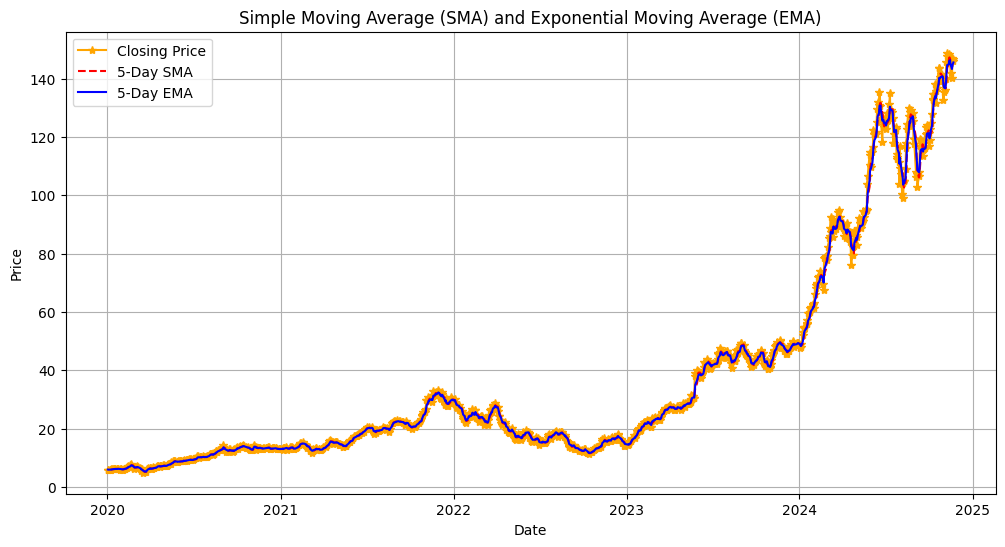

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', marker='*', color='orange')
plt.plot(df.index, df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
plt.plot(df.index, df['EMA'], label=f'{ema_window_size}-Day EMA', linestyle='-', color='blue')
plt.title('Simple Moving Average (SMA) and Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()